In [10]:
from iads.data_traitement import traitement
from iads.nlp import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [11]:
df_jeux_up = pd.read_csv("../data/details_clean_cat.csv")

In [12]:
df_jeux_up["categories"] = df_jeux_up["categories"].map(lambda l: l.split(",") if type(l) == str else l)
df_jeux_up["categories"]

0                                                      NaN
1                                                      NaN
2        [aventure jungle, collection famille, enchere,...
3                                                      NaN
4        [card driven, combinaison, cooperation, deck b...
                               ...                        
16868                                            [plateau]
16869                                             [guerre]
16870                                             [guerre]
16871                                             [guerre]
16872                                              [carte]
Name: categories, Length: 16873, dtype: object

# II. Clustering des catégories d'un jeu :

In [15]:
jeux_cat_up = df_jeux_up["categories"].map(lambda l: l if type(l) != float else [])
jeux_cat_up

0                                                       []
1                                                       []
2        [aventure jungle, collection famille, enchere,...
3                                                       []
4        [card driven, combinaison, cooperation, deck b...
                               ...                        
16868                                            [plateau]
16869                                             [guerre]
16870                                             [guerre]
16871                                             [guerre]
16872                                              [carte]
Name: categories, Length: 16873, dtype: object

In [16]:
cats = []
jeux_cat_up.map(cats.extend)

uc_cats, count_cats = np.unique(cats, return_counts=True)

index      = count_cats.argsort()[::-1]
count_cats = count_cats[index]
uc_cats    = uc_cats[index]

### 2. Clustering des categories : 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(uc_cats)
n_clusters = 155

On lance un clustering `kmeans` sur les catégories pour réaliser un clustering syntaxique (mots en commun entre les catégories)

In [20]:
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", random_state=0)
kmeans.fit(X)

for i in range(n_clusters):
    print(f"Cluster {i}:")
    for category in np.array(uc_cats)[kmeans.labels_ == i]:
        print(f"\t{category}")

Cluster 0:
	transport marchandise
	puzzle
Cluster 1:
	carte
	dé
	hasard dé carte
Cluster 2:
	fantome
Cluster 3:
	gestion
	gestion main
Cluster 4:
	cambriolage
Cluster 5:
	enchere
	enchere poing ferme
	enchere cachee
	enchere tour
	enchere anglais
	enchere japonais
Cluster 6:
	placement
	placement ouvrier
Cluster 7:
	chiffre
	lettre chiffre
Cluster 8:
	plateau
	plateau modulaire
Cluster 9:
	parc attraction
Cluster 10:
	dessin
Cluster 11:
	devinette
Cluster 12:
	sorciere
Cluster 13:
	exploration
Cluster 14:
	enquete policier
Cluster 15:
	erotiqu
Cluster 16:
	horreur
Cluster 17:
	livre hero
	super hero
Cluster 18:
	parcours
Cluster 19:
	question
Cluster 20:
	role
Cluster 21:
	vetement
Cluster 22:
	loup garou
Cluster 23:
	medieval fantastique
	fantastique
	medieval
Cluster 24:
	conte mythe legende
Cluster 25:
	cyclisme
Cluster 26:
	lettre
	lettre mot
Cluster 27:
	equipe
Cluster 28:
	steampunk
Cluster 29:
	mime
Cluster 30:
	bluff
Cluster 31:
	diplomati
Cluster 32:
	historique
Cluster 33:
	r

Donner un nom pour chaque cluster de catégories, tel que le cluster i aura comme nom la concatenation des mots les plus fréquents dans les noms des catégories qui appartiennent à ce dernier.

In [21]:
name_clust = []

for i in range(n_clusters):
    L_clus = []
    
    for category in np.array(uc_cats)[kmeans.labels_ == i]:
        L_clus.extend(category.split(" "))

    noms, counts = np.unique(np.array(L_clus), return_counts=True)
    
    index  = counts.argsort()[::-1]
    counts = counts[index]
    noms   = noms[index]   
    
    name_clust.append(" ".join(noms[counts == counts[0]]))
    
print(name_clust)

['transport puzzle marchandise', 'dé carte', 'fantome', 'gestion', 'cambriolage', 'enchere', 'placement', 'chiffre', 'plateau', 'parc attraction', 'dessin', 'devinette', 'sorciere', 'exploration', 'policier enquete', 'erotiqu', 'horreur', 'hero', 'parcours', 'question', 'role', 'vetement', 'loup garou', 'medieval fantastique', 'mythe legende conte', 'cyclisme', 'lettre', 'equipe', 'steampunk', 'mime', 'bluff', 'diplomati', 'historique', 'rangement', 'logique', 'afrique', 'defausse', 'chat', 'programmation', 'deck building', 'vote', 'taquin', 'dexterite adresse', 'rapidite', 'duplicate', 'animal', 'ville', 'deduction', 'conquete', 'simulation', 'passionner', 'guessing', 'famille collection', 'connexion', 'monstre', 'geek', 'driven card', 'objectif', 'tete casser', 'pirate', 'affrontement', 'tuile', 'pion', 'maritime', 'casual', 'cooperation', 'halloween', 'memoire', 'cochon', 'combinaison', 'immobilier', 'religion', 'aviation', 'volcan', 'vampire', 'chifoumi', 'observation', 'zombie', '

Change les nom des catégories des jeux par le nom de leur cluster

In [22]:
jeux_cat_up_gen = jeux_cat_up.copy()

for i in range(n_clusters):
    cat_clus_i = np.array(uc_cats)[kmeans.labels_ == i]
    jeux_cat_up_gen = jeux_cat_up_gen.map(lambda l : [name_clust[i] if x in cat_clus_i else x for x in l])

In [23]:
cats_gen = []
jeux_cat_up_gen.map(cats_gen.extend)

uc_cats_gen, count_cats = np.unique(cats_gen, return_counts=True)

index       = count_cats.argsort()[::-1]
uc_cats_gen = uc_cats_gen[index]
count_cats  = count_cats[index]

In [24]:
print(f"Après clustering on a {len(uc_cats_gen)} categories")

Après clustering on a 155 categories


### 3. Sélection des N catégories principales : 

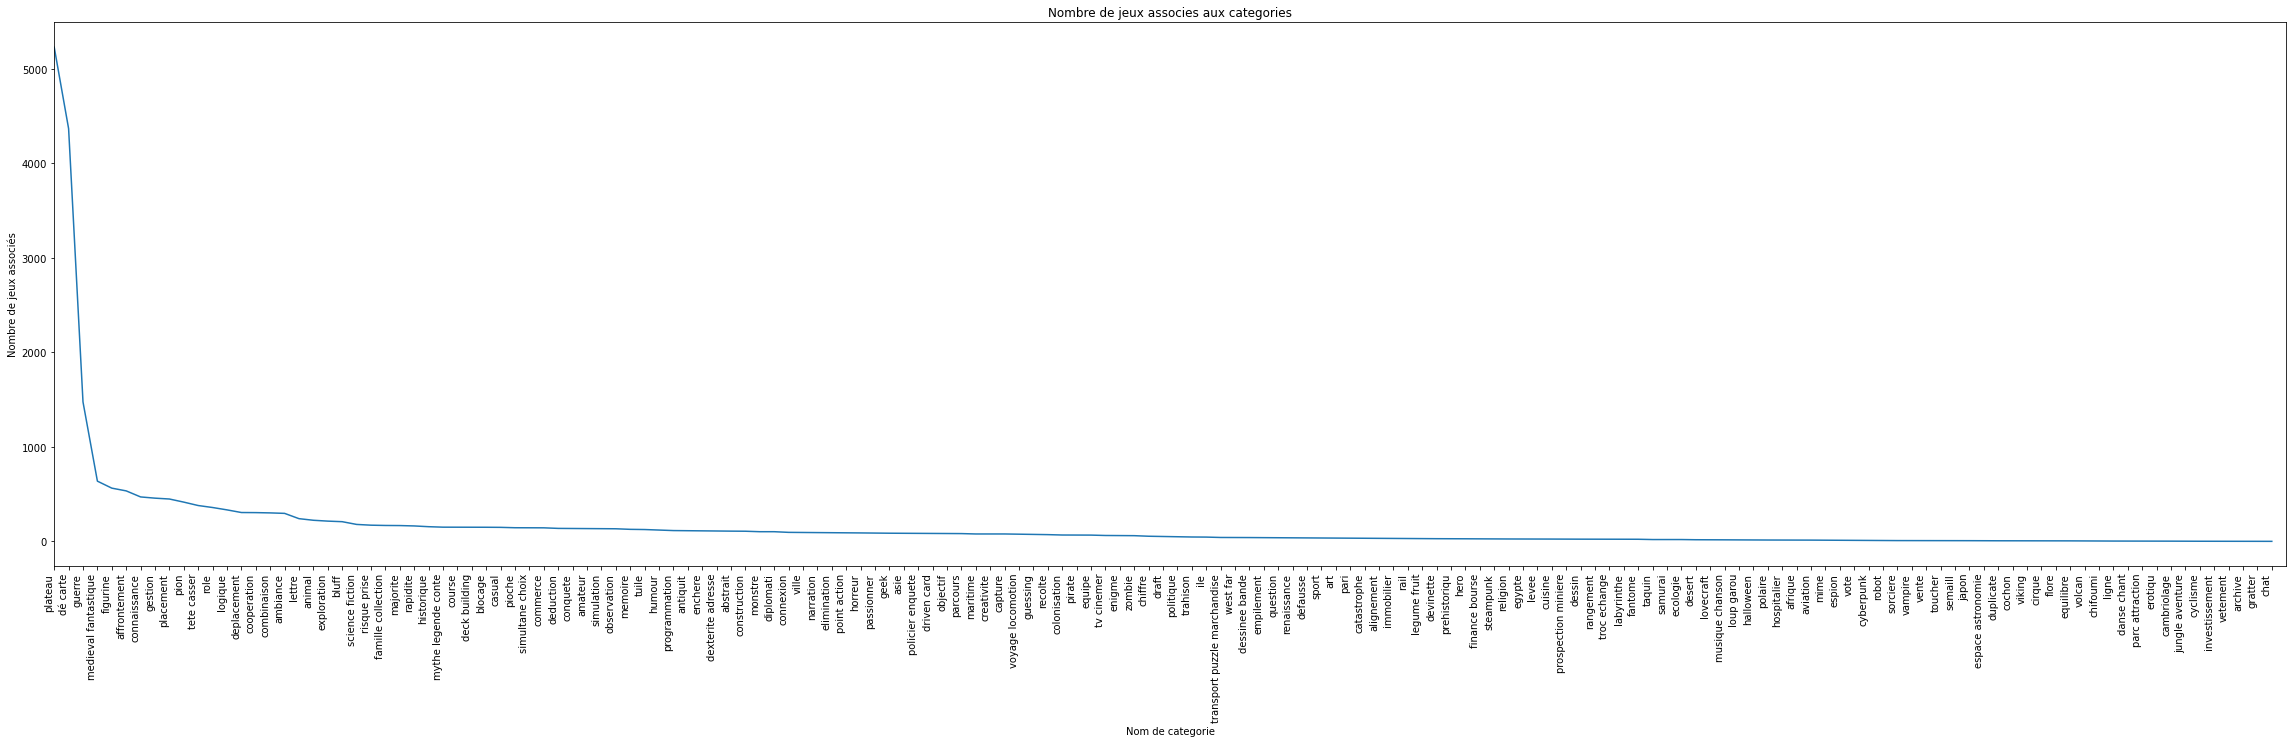

In [25]:
plt.figure(figsize=(40, 10))
plt.plot(uc_cats_gen, count_cats)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories")
plt.xlim((0, len(uc_cats_gen)))
plt.show()

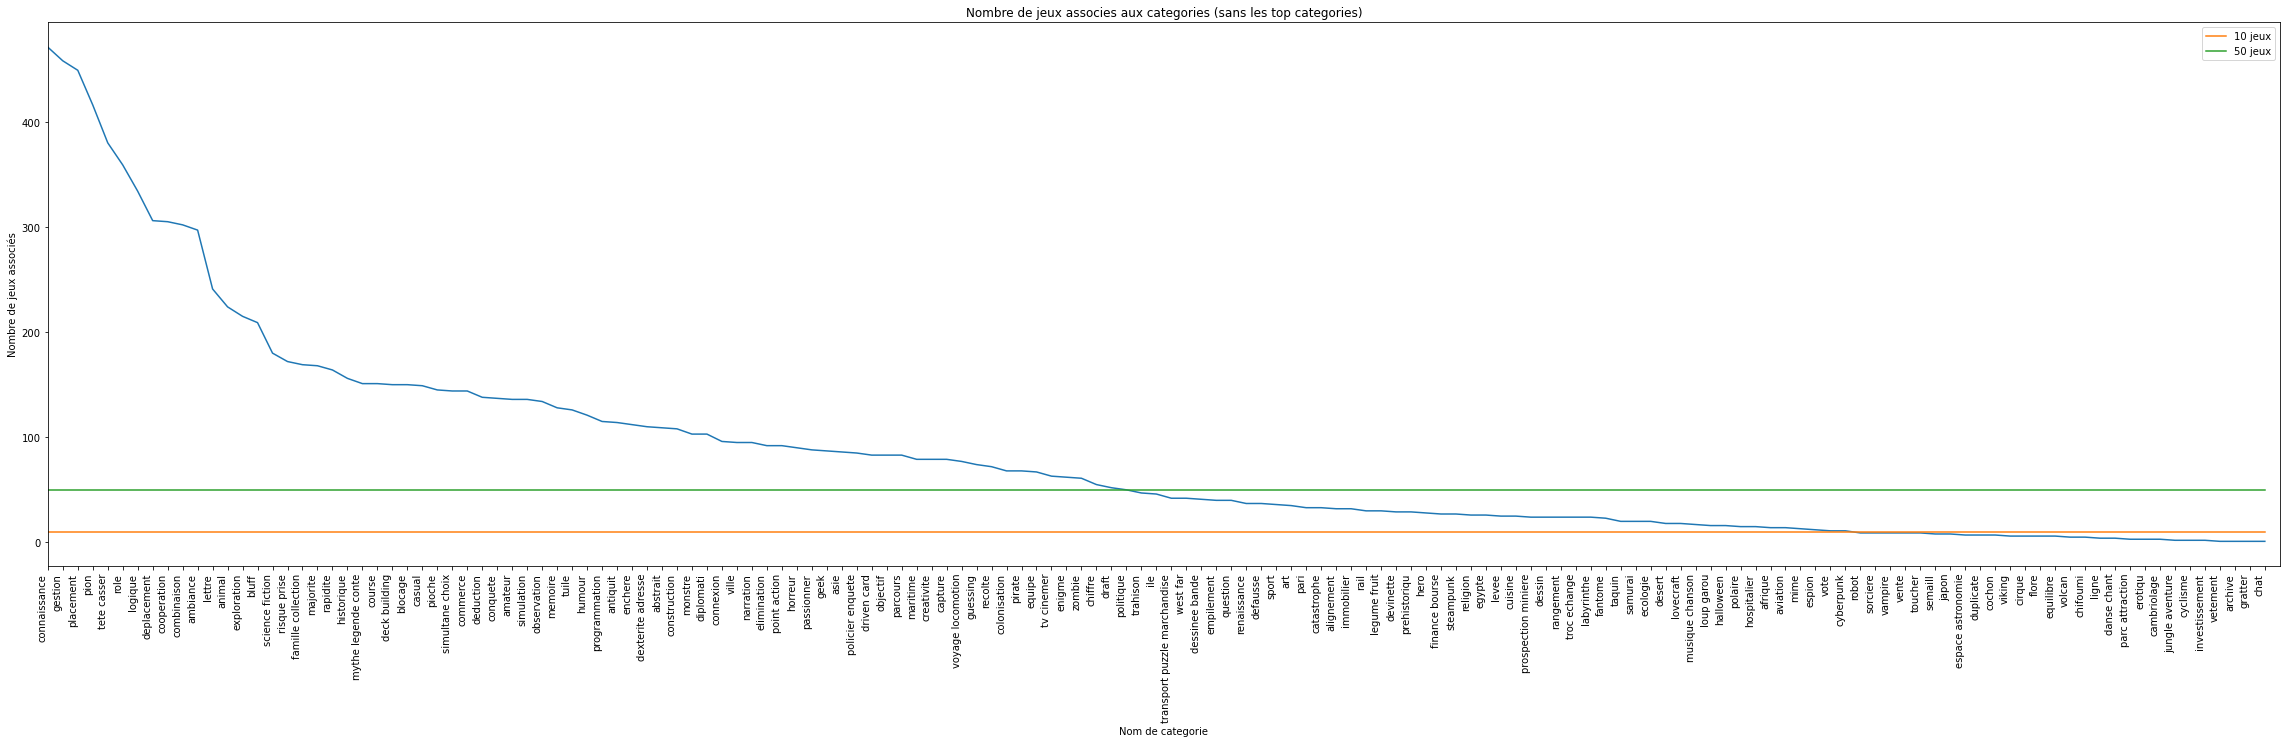

In [26]:
index = count_cats < 500
plt.figure(figsize=(40, 10))
plt.plot(uc_cats_gen[index], count_cats[index])
plt.plot(np.full(len(uc_cats_gen[index]), 10), label="10 jeux")
plt.plot(np.full(len(uc_cats_gen[index]), 50), label="50 jeux")
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories (sans les top categories)")
plt.xlim((0, len(uc_cats_gen[index])))
plt.legend()
plt.show()

**Soit p_C_J la proba jointe des catégories et les jeux**

In [27]:
p_C_J = []
jeux_cat_up_gen.map(lambda l : np.isin(uc_cats_gen, l).astype(int).tolist()).map(p_C_J.append)
p_C_J = np.array(p_C_J)
p_C_J = p_C_J / p_C_J.sum()
p_C_J.shape

(16873, 155)

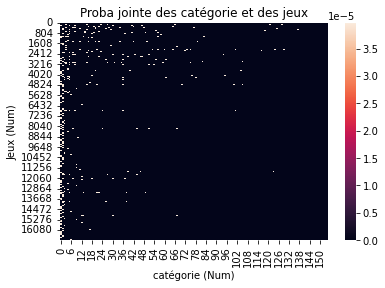

In [28]:
sns.heatmap(p_C_J)
plt.xlabel("catégorie (Num)")
plt.ylabel("Jeux (Num)")
plt.title('Proba jointe des catégorie et des jeux')
plt.show()

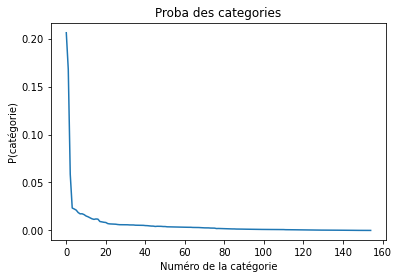

In [29]:
p_cat = p_C_J.sum(axis=0) 
plt.plot(p_cat)
plt.xlabel("Numéro de la catégorie")
plt.ylabel("P(catégorie)")
plt.title("Proba des categories")
plt.show()

**Soit P_CsJ la proba de la catégorie sachant le jeux (liste des categorie des jeux)**

In [30]:
P_CsJ = []
jeux_cat_up_gen.map(lambda l : (np.isin(uc_cats_gen, l).astype(int) / (len(l) if len(l) != 0 else 1)).tolist()).map(P_CsJ.append)
P_CsJ = np.array(P_CsJ)
P_CsJ.shape

(16873, 155)

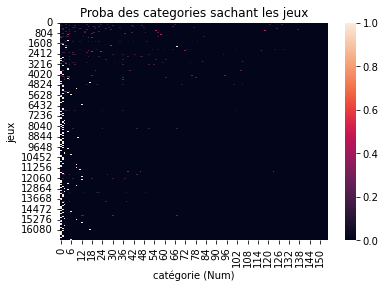

In [31]:
sns.heatmap(P_CsJ)
plt.xlabel("catégorie (Num)")
plt.ylabel("jeux")
plt.title('Proba des categories sachant les jeux')
plt.show()

**Soit Q les fréquences des catégories**

In [32]:
Q = []
jeux_cat_up_gen.map(lambda l : np.isin(uc_cats_gen, l).astype(int).tolist()).map(Q.append)
Q = np.array(Q)
Q = Q.sum(axis=0)

#### Choix d'une catégorie unique pour chaque jeux : 

Comme il existe plusieurs jeux avec plusieurs catégories, une idée pour réduire le nombre de catégories est de choisir qu'une catégorie unique dans l'espoir de supprimer certaines.

La catégorie choisie sera celle qui est maximale pour une certaine mesure

1. **Une mesure d'importance I :**

Soit I une mesure d'importance donné sous cette forme :

$$I(cat_i) = \frac{1}{Q(cat_i)} \times \sum_j P(cat_i | L_j) = \frac{1}{Q(cat_i)} \times \sum_j\frac{E_j(cat_i)}{\lvert L_j \rvert} \ \ avec \ E_j(cat_i) = 1 \ si \ cat_i \in L_j$$

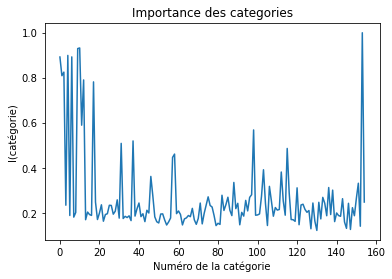

In [33]:
I = P_CsJ.sum(axis=0) / Q
plt.plot(I)
plt.xlabel("Numéro de la catégorie")
plt.ylabel("I(catégorie)")
plt.title("Importance des categories")
plt.show()

In [34]:
jeux_cat_up_I = jeux_cat_up_gen.copy()
l_uc_cats = list(uc_cats_gen)

for j, row in jeux_cat_up_gen.iteritems():
        
    if len(row) == 0:
        continue
        
    I_j = np.zeros(len(l_uc_cats))
    for cat in row:
        i = l_uc_cats.index(cat)
        I_j[i] = I[i]
        
    i_max = np.argmax(I_j)
    jeux_cat_up_I[j] = [l_uc_cats[i_max]]

In [35]:
cats = []
jeux_cat_up_I.map(cats.extend)

one_uc_cats_I, count_cats = np.unique(cats, return_counts=True)

index         = count_cats.argsort()[::-1]
count_cats    = count_cats[index]
one_uc_cats_I = one_uc_cats_I[index]

In [36]:
print("Après selection avec I on a : ")
print(f"\t{len(one_uc_cats_I)} categories différentes")
print(f"\t{(jeux_cat_up_I.map(len) == 0).astype(int).sum()} jeux sans categories")

Après selection avec I on a : 
	109 categories différentes
	2723 jeux sans categories


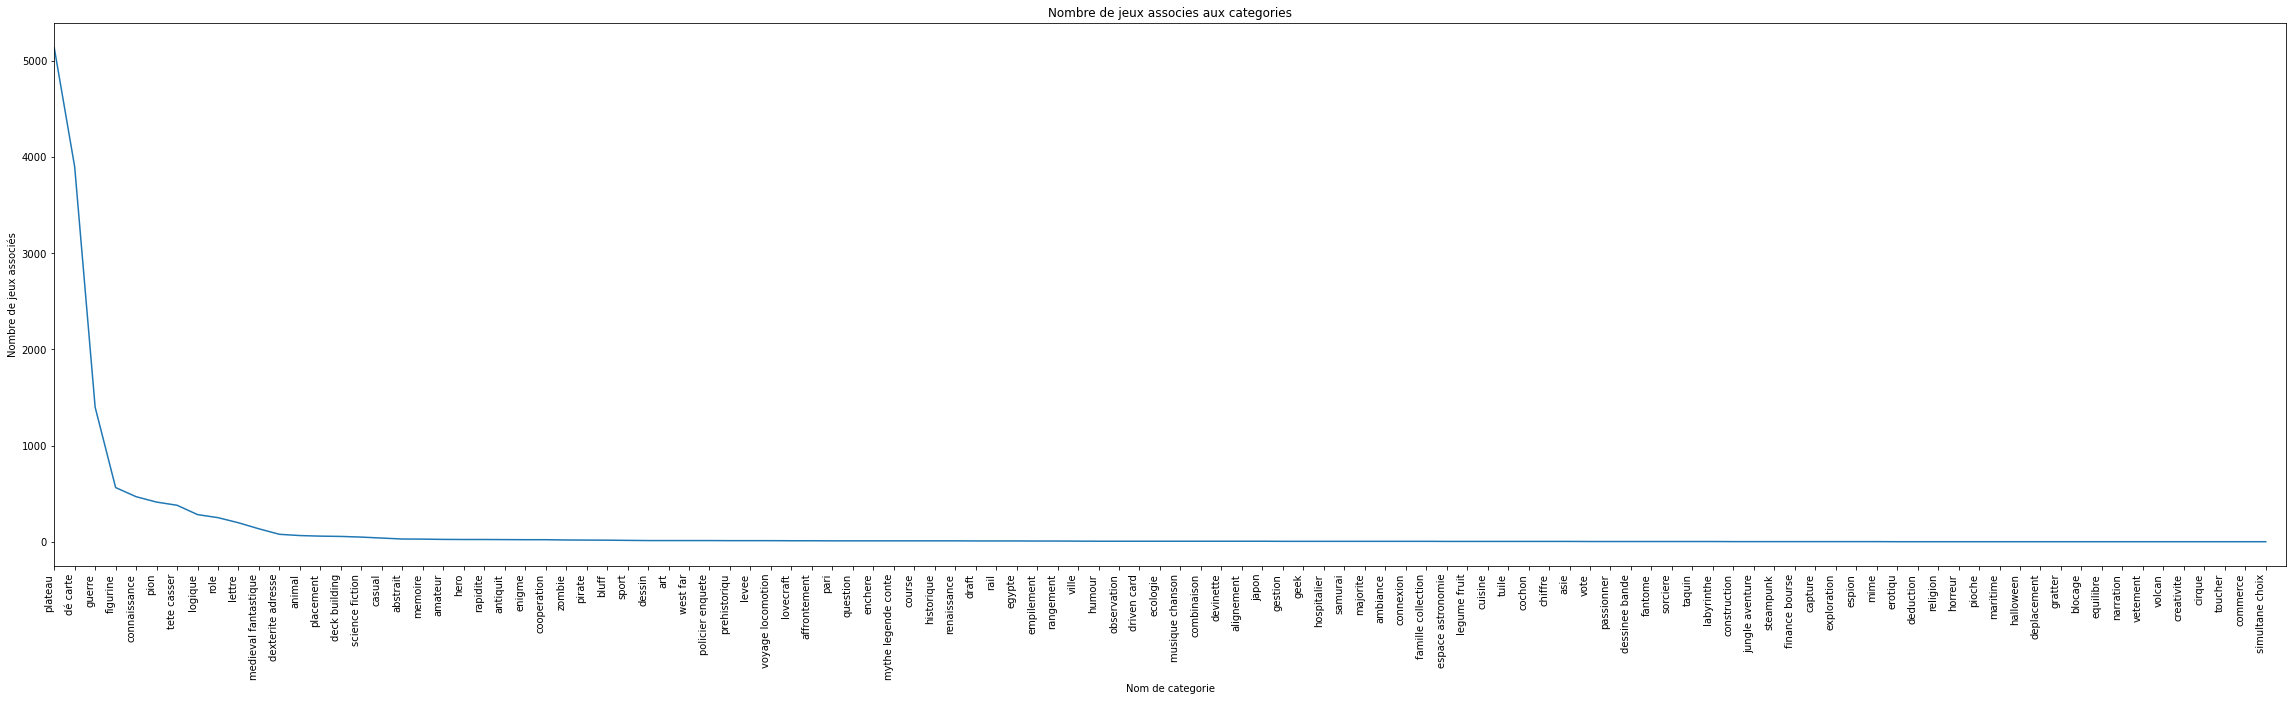

In [37]:
plt.figure(figsize=(40, 10))
plt.plot(one_uc_cats_I, count_cats)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories")
plt.xlim((0, len(one_uc_cats_I)))
plt.show()

2. **La fréquence :**



In [38]:
Q

array([5191, 4232, 1476,  589,  564,  535,  471,  436,  438,  416,  380,
        359,  334,  306,  291,  302,  297,  235,  224,  215,  209,  180,
        172,  169,  168,  164,  156,  151,  151,  150,  150,  149,  145,
        144,  144,  138,  137,  136,  136,  134,  128,  126,  121,  115,
        114,  105,  110,  109,  108,  103,  103,   96,   95,   95,   92,
         92,   90,   88,   87,   86,   85,   83,   83,   83,   79,   79,
         79,   77,   74,   72,   68,   68,   67,   63,   62,   61,   50,
         52,   50,   47,   46,   42,   42,   41,   40,   40,   37,   37,
         36,   35,   33,   33,   32,   32,   30,   30,   29,   29,   28,
         27,   27,   26,   26,   25,   25,   24,   24,   24,   24,   24,
         23,   20,   20,   20,   18,   18,   17,   16,   16,   15,   15,
         14,   14,   13,   12,   11,   11,    9,    9,    9,    9,    9,
          8,    8,    7,    7,    7,    6,    6,    6,    6,    5,    5,
          4,    4,    3,    3,    3,    2,    2,   

In [108]:
jeux_cat_up_Q = jeux_cat_up_gen.copy()
l_uc_cats = list(uc_cats_gen)

for j, row in jeux_cat_up_gen.iteritems():
        
    if len(row) == 0:
        continue
        
    Q_j = np.zeros(len(l_uc_cats))
    for cat in row:
        i = l_uc_cats.index(cat)
        Q_j[i] = Q[i]
        
    i_max = np.argmax(Q_j)
    jeux_cat_up_Q[j] = [l_uc_cats[i_max]]

In [109]:
cats = []
jeux_cat_up_Q.map(cats.extend)

one_uc_cats_Q, count_cats = np.unique(cats, return_counts=True)

index         = count_cats.argsort()[::-1]
count_cats    = count_cats[index]
one_uc_cats_Q = one_uc_cats_Q[index]

In [110]:
print("Après selection avec Q on a : ")
print(f"\t{len(one_uc_cats_Q)} categories différentes")
print(f"\t{(jeux_cat_up_Q.map(len) == 0).astype(int).sum()} jeux sans categories")
print(f"\t{(jeux_cat_up_Q.map(len) == 0).astype(int).sum() / len(jeux_cat_up_Q)} % jeux sans categories")

Après selection avec Q on a : 
	96 categories différentes
	2723 jeux sans categories
	0.16138208972915308 % jeux sans categories


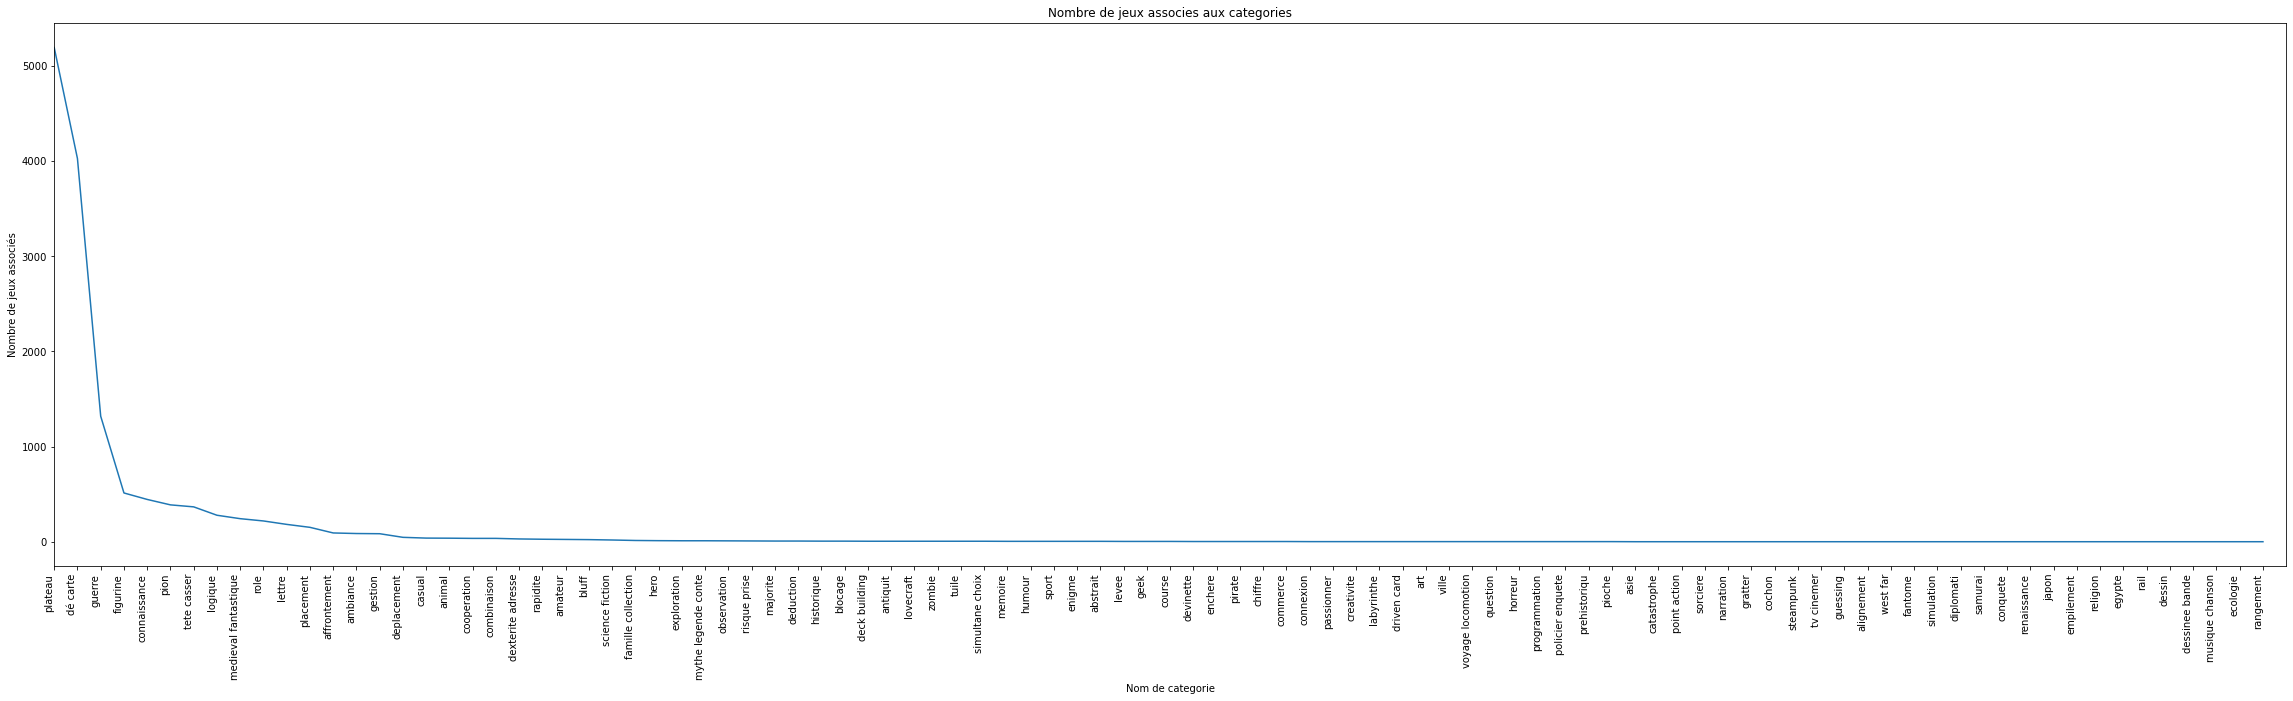

In [111]:
plt.figure(figsize=(40, 10))
plt.plot(one_uc_cats_Q, count_cats)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories")
plt.xlim((0, len(one_uc_cats_Q)))
plt.show()

On décide de prendre le résultat de la mesure de fréquence Q

### 4. Seuillage :

On supprime les catégories qui apparaissent moins d'une certaine valeur `cat_lim`

In [112]:
cat_lim = 6

In [113]:
cats = one_uc_cats_Q[count_cats > cat_lim]

print("Catégories résultantes : \n\n", cats)
print("\nNombre de catégories distinctes restantes : ", len(cats))
print("\nNombre de catégories supprimées : ", len(one_uc_cats_Q) - len(cats))

Catégories résultantes : 

 ['plateau' 'dé carte' 'guerre' 'figurine' 'connaissance' 'pion'
 'tete casser' 'logique' 'medieval fantastique' 'role' 'lettre'
 'placement' 'affrontement' 'ambiance' 'gestion' 'deplacement' 'casual'
 'animal' 'cooperation' 'combinaison' 'dexterite adresse' 'rapidite'
 'amateur' 'bluff' 'science fiction' 'famille collection' 'hero'
 'exploration' 'mythe legende conte' 'observation' 'risque prise'
 'majorite' 'deduction' 'historique' 'blocage']

Nombre de catégories distinctes restantes :  35

Nombre de catégories supprimées :  61


In [114]:
jeux_cat_seuil = jeux_cat_up_Q.copy()

jeux_cat_seuil = jeux_cat_seuil.map(lambda l : l[0] if (len(l) != 0 and l[0] in cats) else np.NaN)
jeux_cat_seuil.head()

0          NaN
1          NaN
2    placement
3          NaN
4      gestion
Name: categories, dtype: object

In [115]:
print("\nNombre de jeux avec des catégories : ", jeux_cat_seuil.notna().astype(int).sum())
print("\nNombre de jeux sans catégories : ", jeux_cat_seuil.isna().astype(int).sum())


Nombre de jeux avec des catégories :  14006

Nombre de jeux sans catégories :  2867


In [118]:
cats = []
jeux_cat_seuil.map(cats.append)

cats_seuil, count_cats = np.unique(cats, return_counts=True)

index      = count_cats.argsort()[::-1]
count_cats = count_cats[index]
cats_seuil = cats_seuil[index]

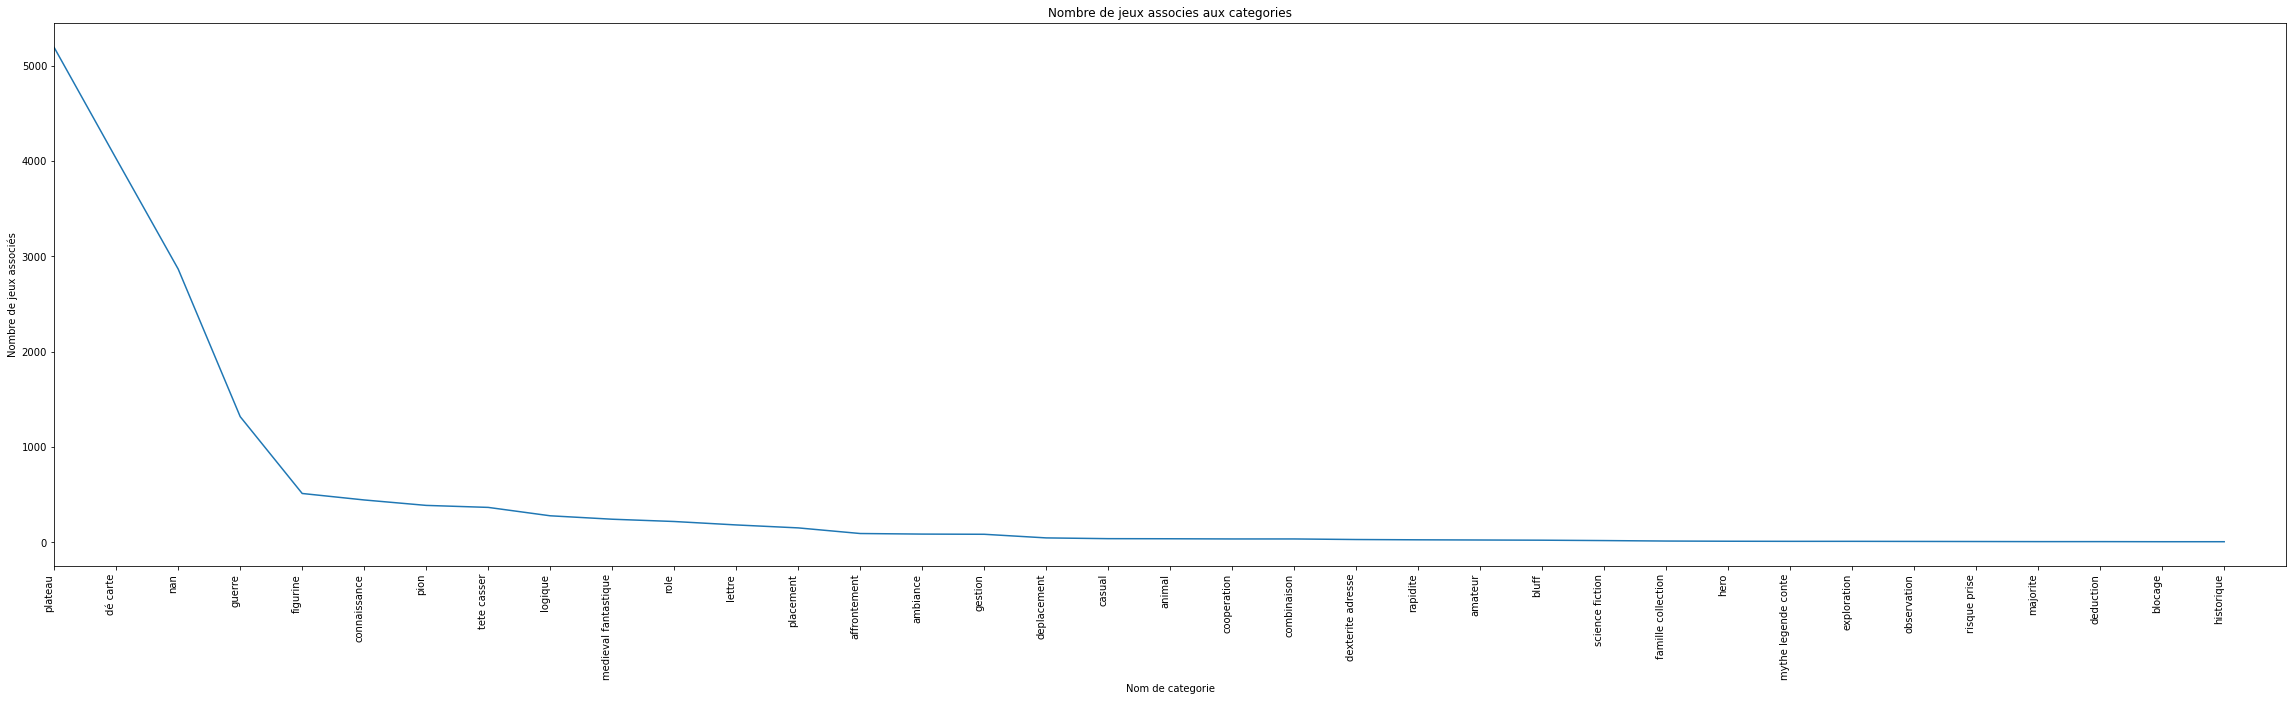

In [119]:
plt.figure(figsize=(40, 10))
plt.plot(cats_seuil, count_cats)
plt.xticks(rotation=90, ha='right')
plt.xlabel("Nom de categorie")
plt.ylabel("Nombre de jeux associés")
plt.title("Nombre de jeux associes aux categories")
plt.xlim((0, len(cats_seuil)))
plt.show()

## III. Sauvegarde du nouveau dataset : 

Mettre à jour le dataset 

In [122]:
df_jeux_up["categories"] = jeux_cat_seuil

In [123]:
df_jeux_up.head()

,Nombre d'avis,Note,categories,description,titre,_id,creators,illustrators,editors,distributors,duration,enfant,ado,adulte,solo,duo,multi
0,19.0,7.58,NaN,\n Marvel United : Unis c...,Marvel United,marvel-united,Eric Lang et Andrea Chiarvesio,Édouard Guiton,CMON Limited,NaN,45.0,0,1,1,1,0,1
1,33.0,7.39,NaN,"\n Chaque année, au print...",Mariposas,mariposas,Elizabeth Hargrave,Matt Paquette et Indi Maverick,Gigamic,NaN,60.0,0,1,1,0,1,1
2,28.0,8.18,placement,\n Vous êtes à la tête d’...,Quetzal,quetzal,Alexandre Garcia,Nastya Lehn,Gigamic,NaN,45.0,0,1,1,0,1,1
3,4.0,9.00,NaN,\n Un Kit de démarrage co...,Alien - Kit de Démarrage,alien-kit-de-demarrage,NaN,NaN,Arkhane Asylum Publishing,NaN,NaN,0,1,1,1,0,1
4,72.0,8.75,gestion,\n Le Dr Foo a créé une t...,The LOOP,the-loop,Maxime Rambourg et Théo Rivière,Simon Caruso,Catch Up Games,NaN,60.0,0,1,1,1,0,1


In [124]:
df_jeux_up.to_csv('../data/details_categ.csv', index=False)